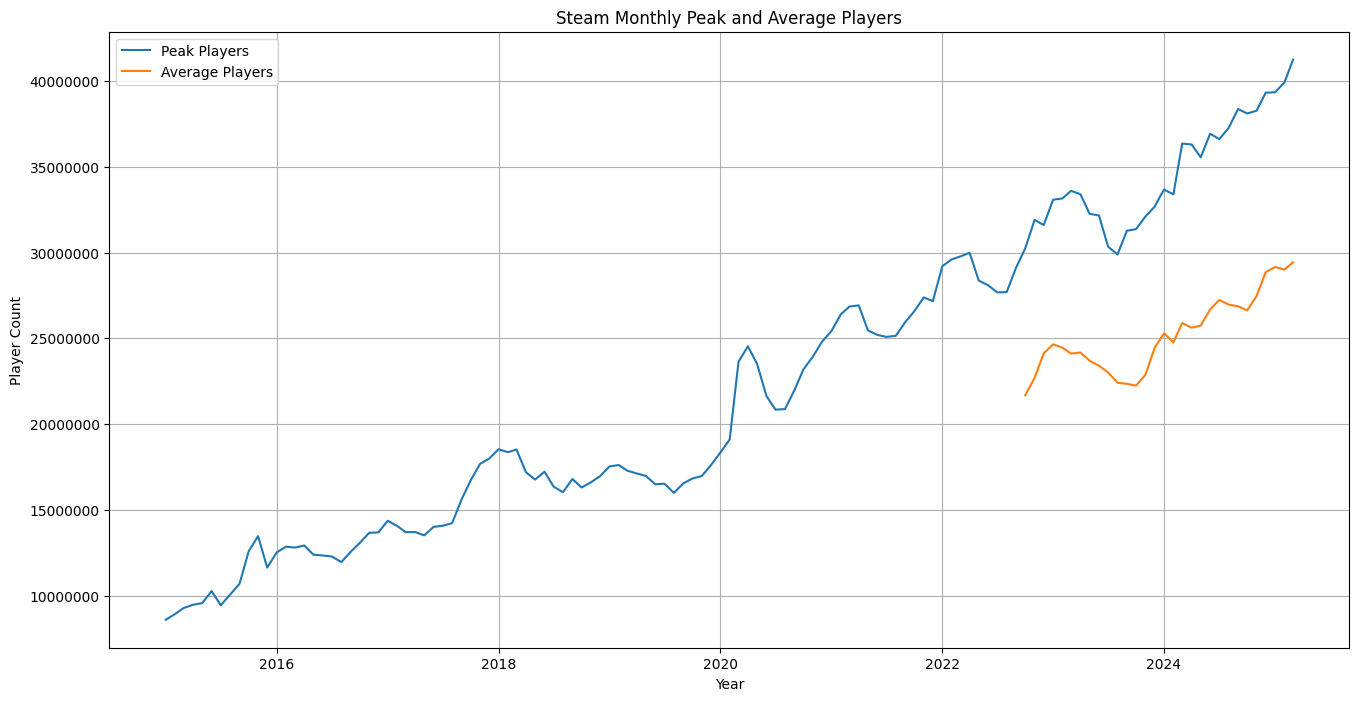

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df1 = pd.read_csv('SteamDB_csv/SteamPlayers.csv')

#removes the first row
df1 = df1[df1['Month'] != 'Last 30 days']
#makes the months actual dates
df1['Month']=pd.to_datetime(df1['Month'], format='%b-%y')

#removes commas from numbers and turns them into float
df1['Peak'] = df1['Peak'].str.replace(',','').astype(float)
df1['Average'] = df1['Average'].str.replace(',', '').astype(float)
#Sorts date from newest to oldest
df1=df1.sort_values('Month')


plt.figure(figsize=(16, 8))
plt.title('Steam Monthly Peak and Average Players')
plt.ylabel('Player Count')
plt.xlabel('Year')
plt.plot(df1['Month'], df1['Peak'], label='Peak Players')
plt.plot(df1['Month'], df1['Average'], label='Average Players')
#makes y-axis labels real numbers
plt.grid(True)
plt.ticklabel_format(style='plain', axis='y')
plt.legend()
plt.savefig("Charts/steam_players_plot", dpi=300) 
plt.show()

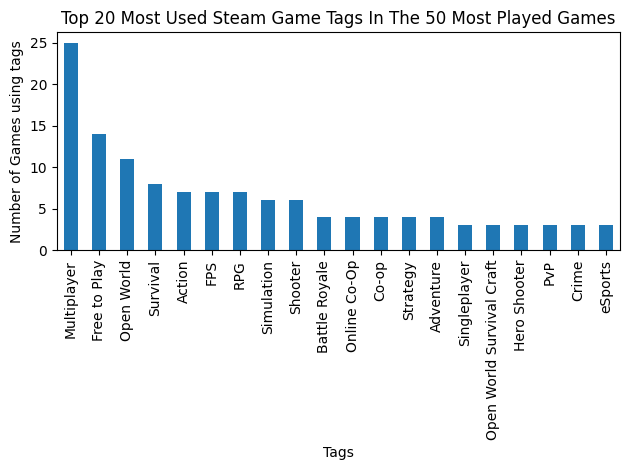

In [2]:

df2 = pd.read_csv('SteamDB_csv/Top100 Steam games.csv')

all_tags = []
for i in range(5, 10):  #find columns with the tags
    for tag in df2.iloc[:,i].dropna():
        if tag.strip():
            all_tags.append(tag.strip()) #counts up all the columns with those tags

#Count frequency and get top 20
tag_counts = pd.Series(all_tags).value_counts().head(20)
#plots a bar chart of the data
tag_counts.plot(kind='bar')
plt.title('Top 20 Most Used Steam Game Tags In The 50 Most Played Games')
plt.ylabel('Number of Games using tags')
plt.xlabel('Tags')
plt.tight_layout()

plt.savefig("Charts/Top 20 Most used steam tags", dpi=300) 

plt.show()

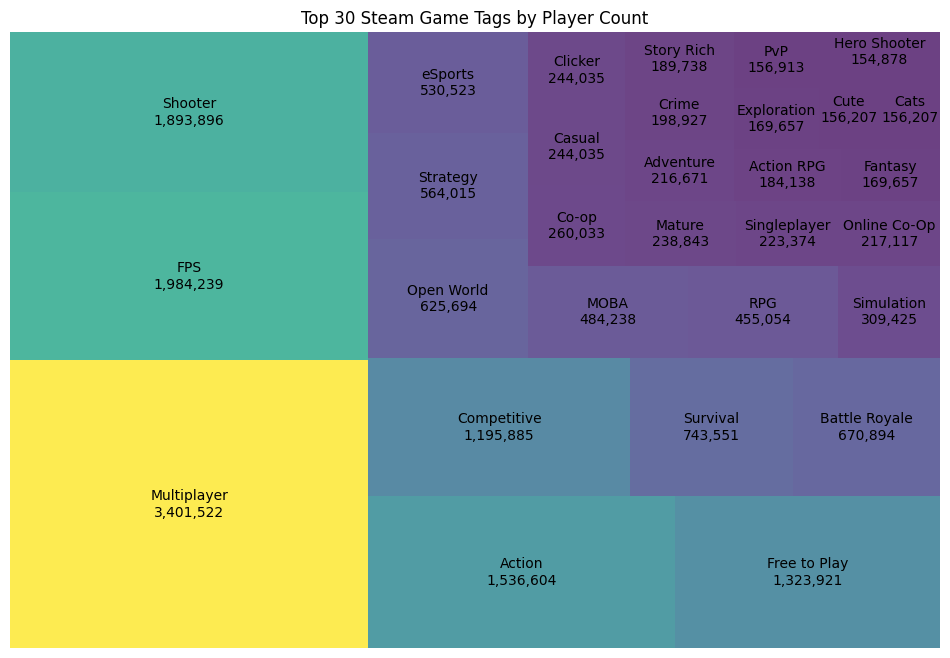

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import squarify as squ

df2 = pd.read_csv('SteamDB_csv/Top100 Steam games.csv')

tag_players = {}

#Goes through each game
for _, row in df2.iterrows():
    current_players = row['Current']
    #Finds the tags then adds up player count
    for i in range(5, 10):
        tag = row.iloc[i]
        if pd.notna(tag) and isinstance(tag, str):
            #removes any spaces at the start of the text
            clean_tag = tag.strip()
            if clean_tag:  
                if clean_tag in tag_players:
                    tag_players[clean_tag] += current_players
                else:
                    tag_players[clean_tag] = current_players

#turns tag_df2 to a dataframe to make it easier to sort
tag_df2=pd.DataFrame({'Tag':list(tag_players.keys()), 'Players':list(tag_players.values())}).sort_values('Players',
    ascending=False)

#Get top 30 tags by player count
top_tags=tag_df2.head(30)
colours = plt.cm.viridis(top_tags['Players']/top_tags['Players'].max())

plt.figure(figsize=(12, 8))
#Creates a treemap and adds labels for each tag
squ.plot(sizes=top_tags['Players'], label=[f"{tag}\n{players:,}" for tag, players in zip(top_tags['Tag'],
    top_tags['Players'])], color=colours, alpha=0.8) 
                     
plt.axis('off')
plt.title('Top 30 Steam Game Tags by Player Count')
plt.savefig("Charts/Top 20 steam tags", dpi=300) 
plt.show()

╒═══════════════════════════════╤═══════════════════════╤═══════════════════╤════════════════════════╤════════════════════╕
│ Name                          │   Rank in Most Played │   Current Players │   Rank of Review Score │ ReviewPercentage   │
╞═══════════════════════════════╪═══════════════════════╪═══════════════════╪════════════════════════╪════════════════════╡
│ Baldur's Gate 3               │                    14 │             79315 │                     54 │ 96.05%             │
├───────────────────────────────┼───────────────────────┼───────────────────┼────────────────────────┼────────────────────┤
│ Schedule I                    │                    15 │             75205 │                      5 │ 97.20%             │
├───────────────────────────────┼───────────────────────┼───────────────────┼────────────────────────┼────────────────────┤
│ Stardew Valley                │                    20 │             66754 │                      2 │ 97.65%             │
├───────

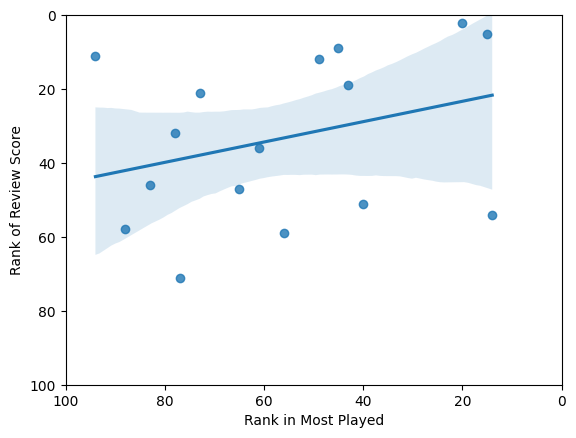

Correlation between 'Rank in Most Played' and 'Rank of Review Score': 0.316


In [4]:
from tabulate import tabulate
top100 = pd.read_csv('SteamDB_csv/Top100 Steam games.csv')
review100 = pd.read_csv('SteamDB_csv/100 highest reviewed.csv')


#combines the two table using the games that have the same names
combined_table = pd.merge(top100[['Name', '#', 'Current']],
                           review100[['Name', '#', 'Rating']], 
                           on='Name', 
                           how='inner',
                           suffixes=('_Top100', '_Reviewed')) #adds a suffixe to the end of the # so they can be differentiated

combined_table = combined_table.rename(columns={'#_Top100': 'Rank in Most Played',
                                                '#_Reviewed': 'Rank of Review Score',
                                                'Current': 'Current Players',
                                                'Rating': 'ReviewPercentage'})

#Sorts the ranks in Top100
merged = combined_table.sort_values('Rank in Most Played')
#makes a nice table
table_data = tabulate(merged, headers='keys', tablefmt='fancy_grid', showindex=False)
print(table_data)
merged.to_html('Charts/steam_players_table.html', index=False)
sns.regplot(x='Rank in Most Played', y='Rank of Review Score', data=merged)
plt.gca().invert_xaxis()  
plt.gca().invert_yaxis()  
plt.xlim(100, 0)
plt.ylim(100, 0)
plt.savefig("Charts/Table of top games", dpi=300) 
plt.show()
correlation = combined_table['Rank in Most Played'].corr(combined_table['Rank of Review Score'])
print(f"Correlation between 'Rank in Most Played' and 'Rank of Review Score': {correlation:.3f}")

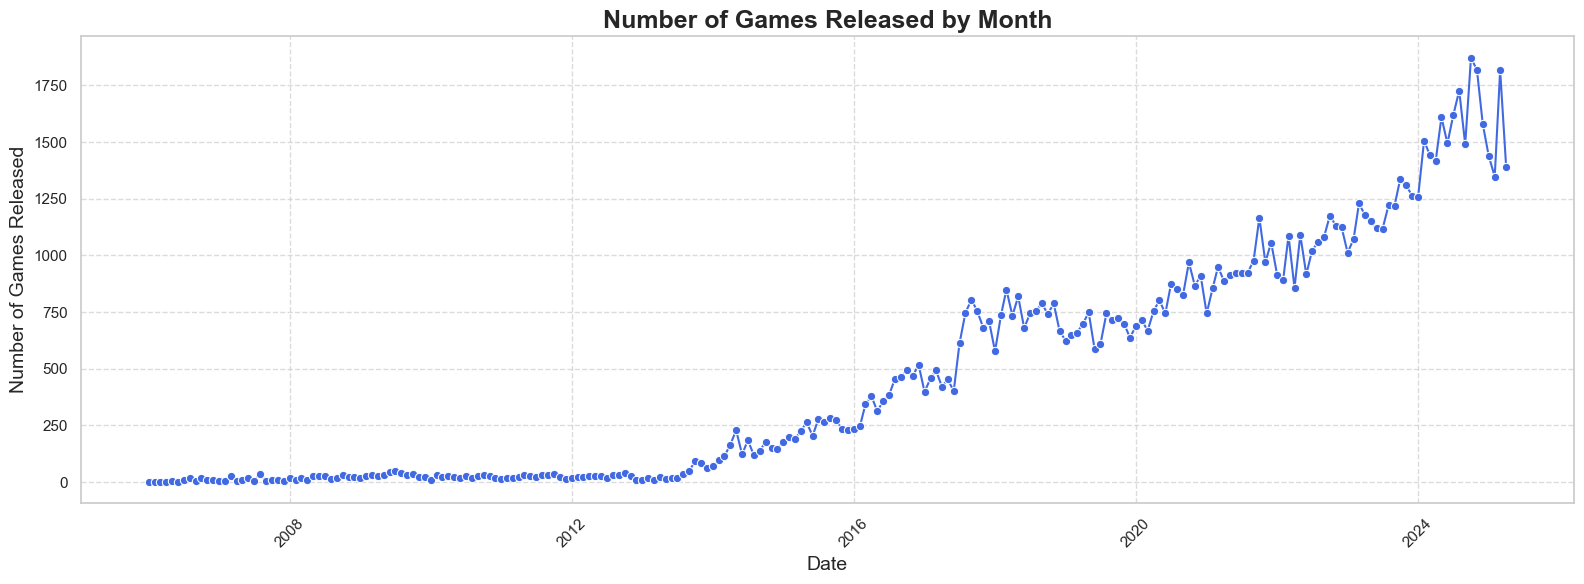

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df4 = pd.read_csv('SteamDB_csv/Games released by month.csv')

# Convert to datetime
df4['DateTime'] = pd.to_datetime(df4['DateTime'])

# Set Seaborn style
sns.set_theme(style="whitegrid")  # Cleaner background

# Create the plot
plt.figure(figsize=(16, 6))
sns.lineplot(x='DateTime', y='Games', data=df4, marker='o', color='royalblue')

# Titles and labels
plt.title('Number of Games Released by Month', fontsize=18, weight='bold')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Games Released', fontsize=14)

# Improve x-axis ticks
plt.xticks(rotation=45)

# Add grid
plt.grid(visible=True, linestyle='--', alpha=0.7)

# Tight layout
plt.tight_layout()

plt.savefig("Charts/Number of Games Released", dpi=300) 
# Show plot
plt.show()
